In [3]:
from sklearn.datasets import fetch_lfw_people

In [5]:
face_data = fetch_lfw_people(min_faces_per_person=80)

In [12]:
X = face_data.data
Y = face_data.target
print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', face_data.target_names)


Input data size : (639, 2914)
Output data size : (639,)
Label names: ['George W Bush' 'Gerhard Schroeder']


In [13]:
for i in range(5):
    print(f'Class {i} has {(Y == i).sum()} samples.')


Class 0 has 530 samples.
Class 1 has 109 samples.
Class 2 has 0 samples.
Class 3 has 0 samples.
Class 4 has 0 samples.


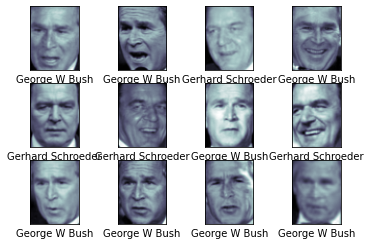

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
    xlabel=face_data.target_names[face_data.target[i]])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [17]:
from sklearn.svm import SVC
clf = SVC(class_weight='balanced', random_state=42)


In [18]:
parameters = {'C': [0.1, 1, 10],'gamma': [1e-07, 1e-08, 1e-06],'kernel' : ['rbf', 'linear'] }


In [19]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)


In [20]:
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1e-07, 1e-08, 1e-06],
                         'kernel': ['rbf', 'linear']})

In [21]:
print('The best model:\n', grid_search.best_params_)
print('The best averaged performance:', grid_search.best_score_)


The best model:
 {'C': 10, 'gamma': 1e-07, 'kernel': 'rbf'}
The best averaged performance: 0.9540350877192983


In [22]:
clf_best = grid_search.best_estimator_
pred = clf_best.predict(X_test)


In [27]:
from sklearn.metrics import classification_report

print(f'The accuracy is: {clf_best.score(X_test, Y_test)*100:.1f}%')
print(classification_report(Y_test, pred, target_names=face_data.target_names))


The accuracy is: 96.9%
                   precision    recall  f1-score   support

    George W Bush       0.99      0.99      0.99       138
Gerhard Schroeder       0.95      0.91      0.93        22

         accuracy                           0.98       160
        macro avg       0.97      0.95      0.96       160
     weighted avg       0.98      0.98      0.98       160



# Boosting image classification performance with PCA


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=42)
svc = SVC(class_weight='balanced', kernel='rbf', random_state=42)

from sklearn.pipeline import Pipeline
model = Pipeline([('pca', pca), ('svc', svc)])


In [25]:
parameters_pipeline = {'svc__C': [1, 3, 10], 'svc__gamma': [0.001, 0.005]}
grid_search = GridSearchCV(model, parameters_pipeline)
grid_search.fit(X_train, Y_train)


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=100, random_state=42,
                                            whiten=True)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             param_grid={'svc__C': [1, 3, 10], 'svc__gamma': [0.001, 0.005]})

In [28]:
print('The best model:\n', grid_search.best_params_)
print('The best averaged performance:', grid_search.best_score_)
model_best = grid_search.best_estimator_
print(f'The accuracy is: {model_best.score(X_test, Y_test)*100:.1f}%')
pred = model_best.predict(X_test)
print(classification_report(Y_test, pred, target_names=face_data.target_names))


The best model:
 {'svc__C': 1, 'svc__gamma': 0.005}
The best averaged performance: 0.9519517543859649
The accuracy is: 98.1%
                   precision    recall  f1-score   support

    George W Bush       0.99      0.99      0.99       138
Gerhard Schroeder       0.95      0.91      0.93        22

         accuracy                           0.98       160
        macro avg       0.97      0.95      0.96       160
     weighted avg       0.98      0.98      0.98       160

